In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
import matplotlib.pyplot as plt

In [17]:
data = pd.read_csv("C:\\Users\\Udhaya\\Documents\\prodigy_tasks\\bank+marketing\\bank\\bank-full.csv",delimiter=';')


In [19]:
label_encoder = LabelEncoder()


In [21]:
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = label_encoder.fit_transform(data[column])

In [23]:
print(data.columns)


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


In [25]:
X = data.drop('y', axis=1)
y = data['y']


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [31]:
y_pred = clf.predict(X_test)

In [33]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 87.38%


In [35]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93     11966
           1       0.46      0.47      0.47      1598

    accuracy                           0.87     13564
   macro avg       0.70      0.70      0.70     13564
weighted avg       0.87      0.87      0.87     13564



In [37]:
clf_simplified = DecisionTreeClassifier(random_state=42, max_depth=3)
clf_simplified.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

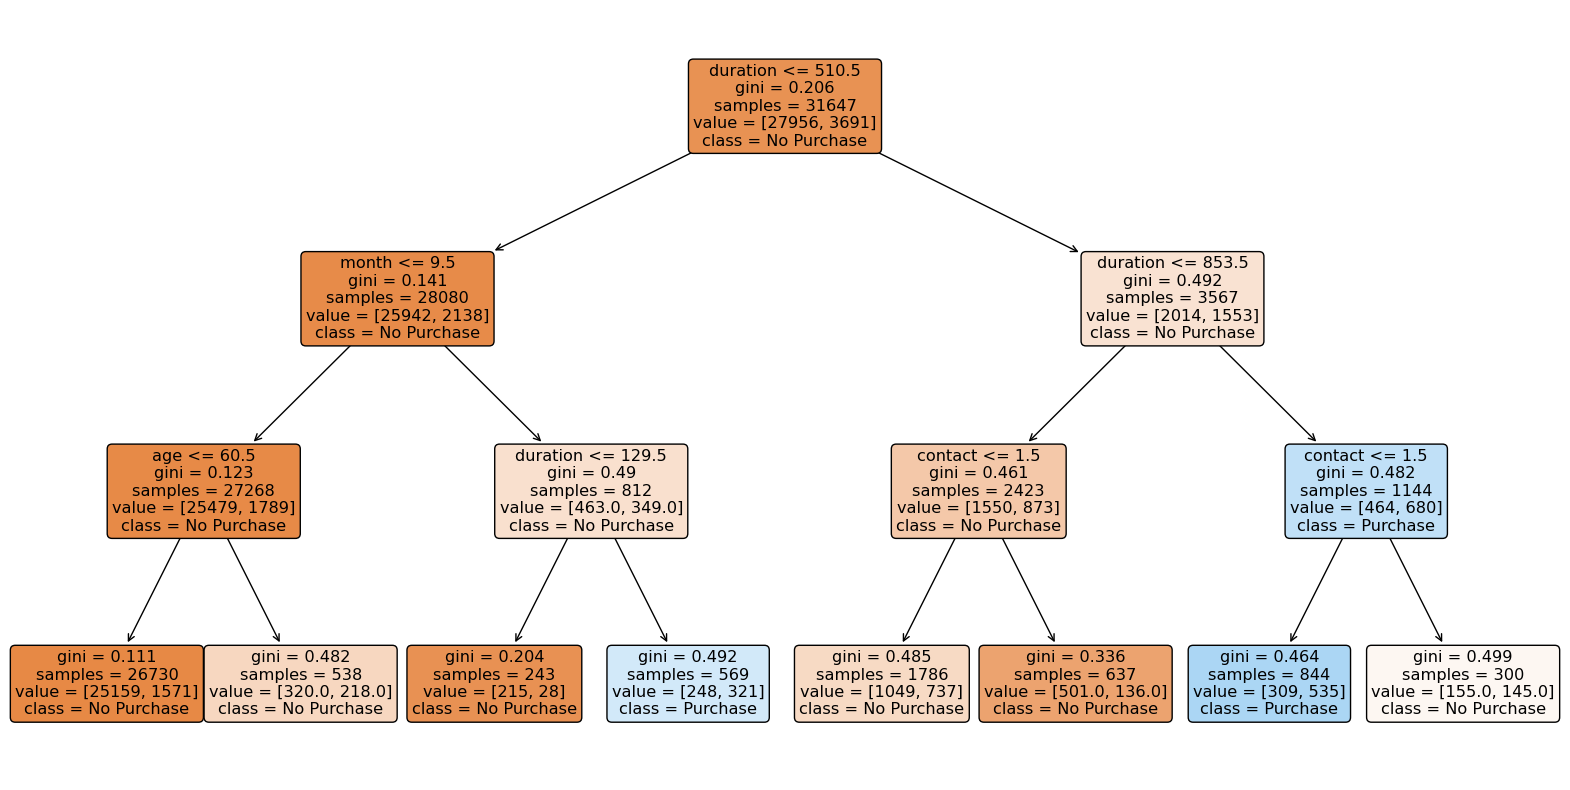

In [39]:
plt.figure(figsize=(20,10))
tree.plot_tree(clf_simplified, filled=True, feature_names=X.columns, class_names=['No Purchase', 'Purchase'], rounded=True)
plt.show()